In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from scipy.optimize import curve_fit

import gm2
import trfp
import plotting_functions as plt2
import analysis_helper as helper
import helper_function_candidates as helper_old

Welcome to JupyROOT 6.12/04


In [3]:
filename = 'hdf5/sanitized/60hr.h5'

fp_interp_df = pd.read_hdf(filename, key='fp_df_1')
tr_interp_df_1 = pd.read_hdf(filename, key='tr_df_1')
tr_interp_df_2 = pd.read_hdf(filename, key='tr_df_2')

fp_moment_df = helper.calc_moment_df(fp_interp_df)
tr_moment_df_1 = helper.calc_moment_df(tr_interp_df_1)
tr_moment_df_2 = helper.calc_moment_df(tr_interp_df_2)

tr_corr_df_1 = helper_old.trolley_footprint_replacement(tr_moment_df_1)
tr_corr_df_2 = helper_old.trolley_footprint_replacement(tr_moment_df_2)

tr_baseline_1, fp_baseline_1, baseline_time_1, summed_azimuth_1, summed_pts_1 = helper_old.trolley_run_station_average(tr_corr_df_1)
tr_baseline_2, fp_baseline_2, baseline_time_2, summed_azimuth_2, summed_pts_2 = helper_old.trolley_run_station_average(tr_corr_df_2)

vtm_df_1 = helper.vtm_calc(fp_moment_df,
                         baseline_time_1, baseline_time_2,
                         tr_baseline_1, tr_baseline_1,
                         fp_baseline_1, fp_baseline_1)

vtm_df_2 = helper.vtm_calc(fp_moment_df,
                         baseline_time_1, baseline_time_2,
                         tr_baseline_1, tr_baseline_2,
                         fp_baseline_1, fp_baseline_2)

Finished calculating all moments for 257281 events.         
Finished calculating all moments for 4386 events.
Finished calculating all moments for 4363 events.
Removing trolley image from station 71.                            


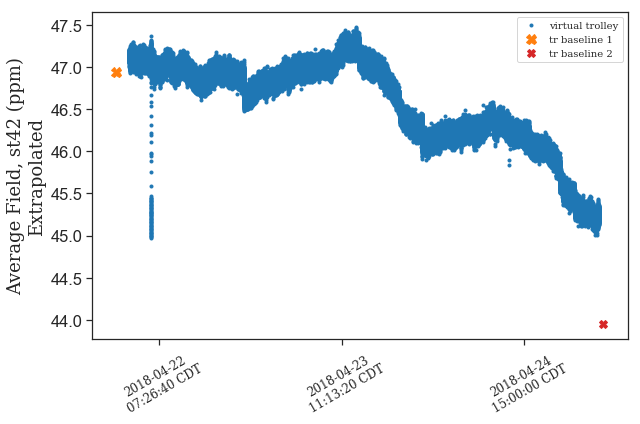

In [27]:
fig1, ax1 = plt.subplots(1,1)

ax1.plot(vtm_df_1.index.values, (vtm_df_1['st42,m1']-50000)/61.79, '.', color='C0', label='virtual trolley')
ax1.plot(baseline_time_1[42,0], (tr_baseline_1[42,0]-50000)/61.79, 'X', color='C1', markersize=10, label='tr baseline 1')
ax1.plot(baseline_time_2[42,0], (tr_baseline_2[42,0]-50000)/61.79, 'X', color='C3', markersize=8, label='tr baseline 2')


ax1.set_ylabel('Average Field, st42 (ppm)\nExtrapolated', fontdict={'family':'serif'})

ax1.legend(prop={'size':10, 'family':'serif'})

plt2.plt_unix_time_to_CST(ax1)

fig1.set_size_inches(9,6)
fig1.tight_layout()

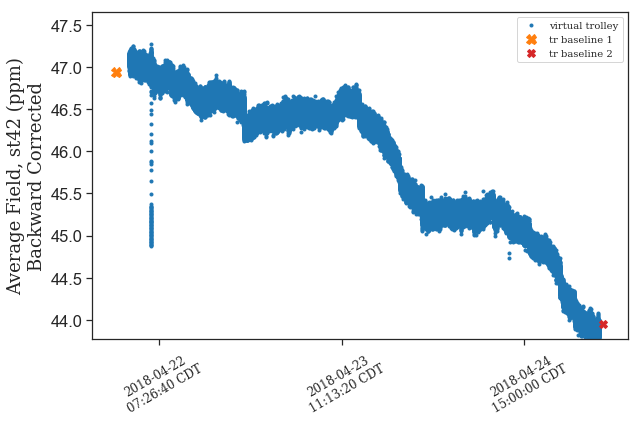

In [28]:
fig2, ax2 = plt.subplots(1,1)

ax2.plot(vtm_df_2.index.values, (vtm_df_2['st42,m1']-50000)/61.79, '.', color='C0', label='virtual trolley')
ax2.plot(baseline_time_1[42,0], (tr_baseline_1[42,0]-50000)/61.79, 'X', color='C1', markersize=10, label='tr baseline 1')
ax2.plot(baseline_time_2[42,0], (tr_baseline_2[42,0]-50000)/61.79, 'X', color='C3', markersize=8, label='tr baseline 2')


ax2.set_ylabel('Average Field, st42 (ppm)\nBackward Corrected', fontdict={'family':'serif'})

ax2.legend(prop={'size':10, 'family':'serif'})

ax2.set_xlim(ax1.get_xlim())
plt2.plt_unix_time_to_CST(ax2)

ax2.set_ylim(ax1.get_ylim())

fig2.set_size_inches(9,6)
fig2.tight_layout()